**ANALYSIS**

1. Almost four - fifths (77,8%) of all drivers are from urban territtories. They make 87% of their rides in cities and the rest in suburbs and rural areas. With such a high numbers, these rides rise only 46% of company's proceeds.
2. Suburban rides make up only 26% of all rides, but the average fare is higher than that in cities, therefore they bring more than one third of a total revenue, that means that this area of activity can be developed in a future.
3. Rural area fares are the most expensive ones - the average fare is almost 40% higher than the one in an urban city. With only 3% of all drivers and 5% of all rides, rural area brings more than 17% of a total revenue.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from itertools import cycle

In [2]:
city = pd.read_csv('Resources/city_data.csv', low_memory=False)
rides = pd.read_csv('Resources/ride_data.csv', low_memory=False)

**Create an organized DF from the city file and get Total Number of Drivers Per City and
City Type (Urban, Suburban, Rural)**

In [3]:
# 2 city named "Port James" with 15 & 3 drivers. After grouping turned into 1 city with 18 drivers.
city_group = city.groupby(['city', 'type'])
city_group_df = city_group.sum()
struct_city = city_group_df.reset_index()

**Get Average Fare ($) Per City**

In [4]:
rides_gr = rides.groupby('city')
fare_df = rides_gr.mean()
fare_df.drop('ride_id', axis=1, inplace=True)
fare = fare_df.reset_index()

**Get Total Number of Rides Per City**

In [5]:
total_rides = rides_gr.count()
total_rides.drop('fare', axis=1, inplace=True)
total_rides.drop('date', axis=1, inplace=True)
tot_rides = total_rides.reset_index()

**Merge all 3 DF in one**

In [6]:
merge1 = pd.merge(struct_city, fare, on='city')
allmerged = pd.merge(merge1, tot_rides, on='city')
allmerged.drop('city', axis=1, inplace=True)
allmerged.columns = ['City Type', 'Driver Count', 'Average Fare ($)', 'Total Number of Rides (Per City)']

In [7]:
# Create a copy to do whatever I want with it
forplot = allmerged.copy()
forplot.head()

,City Type,Driver Count,Average Fare ($),Total Number of Rides (Per City)
0,Urban,21,23.928710,31
1,Urban,67,20.609615,26
2,Suburban,16,37.315556,9
3,Urban,21,23.625000,22
4,Urban,49,21.981579,19


**Create a Bubble Plot**

In [8]:
# Create a dict {City Type: Color} Can be used for any numer of types, just need to add new colors in colorcycle.
citytype = {}
# Use cycle() to iterate through colors,  colors can be easily added, changed and modified
colorcycle = cycle(['#87cefa', '#f08080', '#FFD700'])
for i in range(len(forplot['City Type'])):
    citytype[forplot['City Type'][i]] = next(colorcycle)
    
# Create a list of colors, will be used in plot to coloring different city types
colors = [citytype[i] for i in forplot['City Type'] if i in citytype]

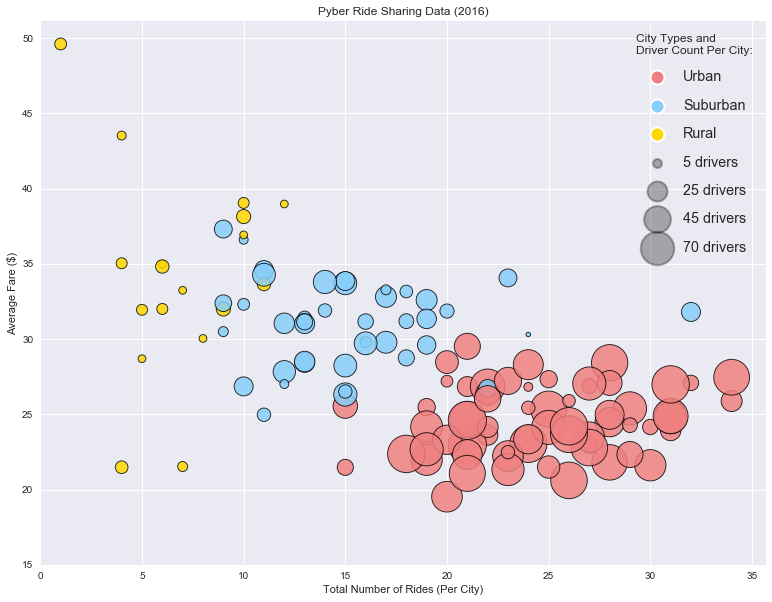

In [9]:
# Set seaborn grey style
sns.set()
# Create a plot
forplot.plot(kind='scatter', x='Total Number of Rides (Per City)', y='Average Fare ($)', s=forplot['Driver Count']*20,
                        c=colors, alpha=0.85, edgecolors="black", linewidth=0.9, figsize=(13,10),
                       title='Pyber Ride Sharing Data (2016)')
plt.ylim(15, None)
plt.xlim(0, None)

# Create a legend, that consists of 2 parts: City types and Driver count per city
for key in citytype:
    plt.scatter([],[], color=citytype[key], label=key, marker='o', edgecolor='white', linewidth=2)
for drcount in [5,25,45,70]:
    plt.scatter([], [], c='k', alpha=0.3, s=drcount*4, label=str(drcount) + ' drivers', edgecolor='black', linewidth=2)
plt.legend(scatterpoints=1, markerscale=2, loc=1, fontsize='large', labelspacing=1,
           title='City Types and\nDriver Count Per City:')

**Total Fares by City Type**

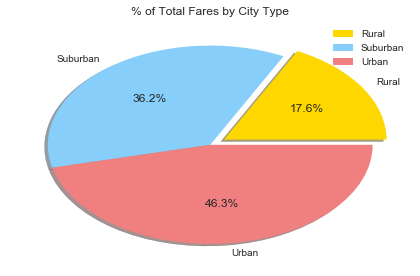

In [10]:
onemorecopy = allmerged.copy()
forpies = onemorecopy.groupby('City Type')
pie_df = forpies.sum()

# Find values < 20% for Explode
explode_f = [0.1 if (item/(pie_df['Average Fare ($)']).sum()*100) < 20 else 0.0 for item in pie_df['Average Fare ($)']]

farebysity = pie_df.plot(kind='pie', y= 'Average Fare ($)', title=('% of Total Fares by City Type'),
                          colors=['#FFD700', '#87cefa', '#f08080'], autopct="%1.1f%%", shadow=True, startangle=360,
                          center=(0,0), explode = explode_f)
plt.ylabel('')
plt.tight_layout()

In [11]:
forpies.mean()

,Driver Count,Average Fare ($),Total Number of Rides (Per City)
City Type,,,
Rural,5.777778,34.207143,6.944444
Suburban,15.560976,30.942131,15.243902
Urban,39.500000,24.603991,24.621212


**Total Rides by City Type**

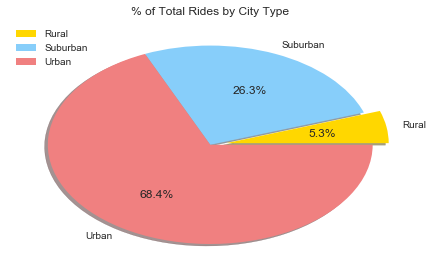

In [12]:
explode_r = [0.1 if (item/(pie_df['Total Number of Rides (Per City)']).sum()*100) < 20 else
             0.0 for item in pie_df['Total Number of Rides (Per City)']]

farebysity = pie_df.plot(kind='pie', y= 'Total Number of Rides (Per City)', title=('% of Total Rides by City Type'),
                          colors=['#FFD700', '#87cefa', '#f08080'], autopct="%1.1f%%", shadow=True, startangle=360,
                          center=(0,0), explode = explode_r)
plt.ylabel('')
plt.tight_layout()

**Total Drivers by City Type**

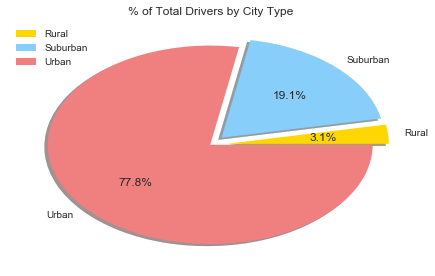

In [13]:
explode_d = [0.1 if (item/(pie_df['Driver Count']).sum()*100) < 20 else 0.0 for item in pie_df['Driver Count']]

farebysity = pie_df.plot(kind='pie', y= 'Driver Count', title=('% of Total Drivers by City Type'),
                          colors=['#FFD700', '#87cefa', '#f08080'], autopct="%1.1f%%", shadow=True, startangle=360,
                          center=(0,0), explode = explode_d)
plt.ylabel('')
plt.tight_layout()

(0, 36.371000419608976)

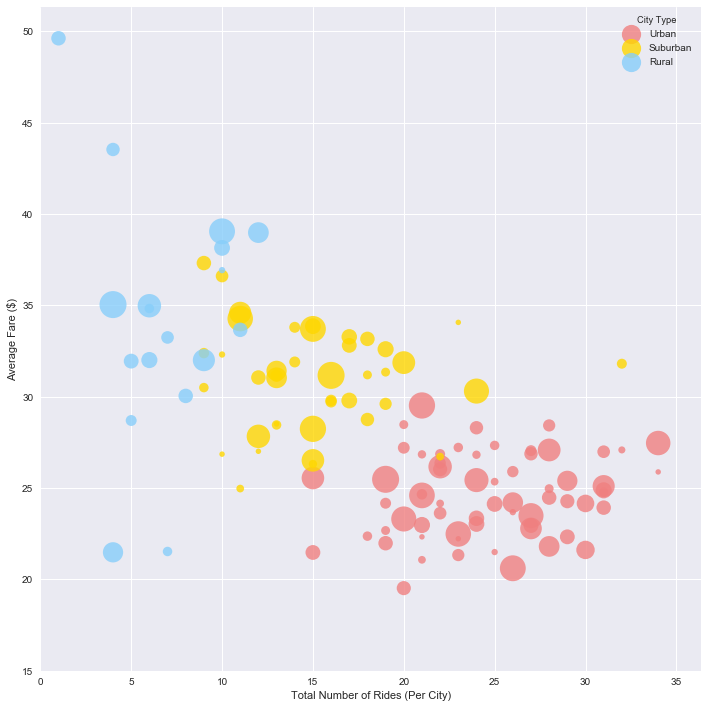

In [14]:
# Attempt to create a plot with seaborn. Not finished, looks weird.
colorlist = ['#f08080', '#FFD700', '#87cefa']
sns.lmplot(x='Total Number of Rides (Per City)', y='Average Fare ($)', data=forplot, fit_reg=False,
           scatter_kws={"s":(forplot['Driver Count']*10)}, hue='City Type', size = 10, palette = colorlist,
          legend_out=False)
plt.ylim(15, None)
plt.xlim(0, None)